## Análise básica dos links do Spotify

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df3 = pd.read_csv("../data/data_3.csv")
df4 = pd.read_csv("../data/data_4.csv")
df5 = pd.read_csv("../data/data_5.csv")
df6 = pd.read_csv("../data/data_6.csv")


df = pd.concat([df3, df4, df5, df6], join='inner')

df.head()

,SINCE_DATE,UNITIL_DATE,SPOTIFY_URL,TYPE_URL
0,MARCH,MARCH,https://open.spotify.com/track/2CNJMsnYnuOVog1...,track
1,MARCH,MARCH,https://track.adform.net/C/?bn=41279147%0A,other
2,MARCH,MARCH,https://open.spotify.com/track/6X7H3JTAUGAL1rS...,track
3,MARCH,MARCH,https://open.spotify.com/track/11OwAR3GlBj9E35...,track
4,MARCH,MARCH,https://open.spotify.com/track/4258fiEd2cnCC5d...,track


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8059 entries, 0 to 2369
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SINCE_DATE   8059 non-null   object
 1   UNITIL_DATE  8059 non-null   object
 2   SPOTIFY_URL  8059 non-null   object
 3   TYPE_URL     8059 non-null   object
dtypes: object(4)
memory usage: 314.8+ KB


Coletando apenas URLS do Spotify

In [4]:
query_url = df["SPOTIFY_URL"].apply(lambda x : 1 if ("spotify" in x) else 0)

In [5]:
df.drop(query_url, inplace=True)

In [6]:
df.head()

,SINCE_DATE,UNITIL_DATE,SPOTIFY_URL,TYPE_URL
2,MARCH,MARCH,https://open.spotify.com/track/6X7H3JTAUGAL1rS...,track
3,MARCH,MARCH,https://open.spotify.com/track/11OwAR3GlBj9E35...,track
4,MARCH,MARCH,https://open.spotify.com/track/4258fiEd2cnCC5d...,track
5,MARCH,MARCH,https://open.spotify.com/track/0M955bMOoilikPX...,track
6,MARCH,MARCH,https://open.spotify.com/track/6m5ucBSM6b5saQv...,track


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8051 entries, 2 to 2369
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SINCE_DATE   8051 non-null   object
 1   UNITIL_DATE  8051 non-null   object
 2   SPOTIFY_URL  8051 non-null   object
 3   TYPE_URL     8051 non-null   object
dtypes: object(4)
memory usage: 314.5+ KB


In [8]:
type_url = df.groupby("TYPE_URL").size().reset_index(name='COUNT').sort_values(["COUNT"], ascending=False)
type_url

,TYPE_URL,COUNT
4,track,5723
3,playlist,929
0,album,837
2,other,467
1,artist,95


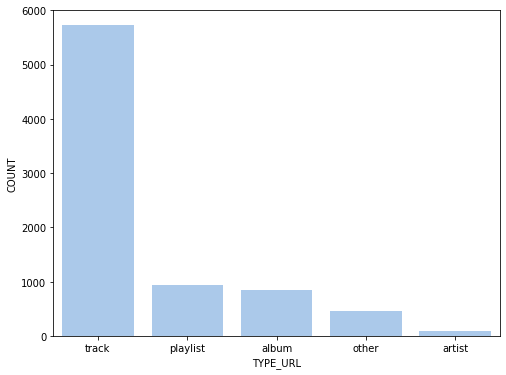

In [9]:
plt.subplots(figsize=(8, 6))

sns.set_color_codes("pastel")
sns.barplot(x="TYPE_URL", y="COUNT", data=type_url,
            label="Total", color="b")
plt.show()

## Trabalhando com a API do Spotify

In [10]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [11]:
SPOTIPY_CLIENT_ID = "b391ac85c601490c97f5543085f9421c"
SPOTIPY_CLIENT_SECRET = "bc62935c90c242e0ab32ee08a2e5c404"

sp = spotipy.Spotify(client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET))

Coletando apenas as urls de música. Estas são identificadas pelo termo **track** na string.

In [14]:
artist_df = df[ df["TYPE_URL"] == "artist" ]
artist_df.head()

,SINCE_DATE,UNITIL_DATE,SPOTIFY_URL,TYPE_URL
42,MARCH,MARCH,https://open.spotify.com/artist/2DlbynS2Y7OsNE...,artist
110,MARCH,MARCH,https://open.spotify.com/artist/28ij3pyntAbYO9...,artist
164,MARCH,MARCH,https://open.spotify.com/artist/1hRs60foVmjwBi...,artist
244,MARCH,MARCH,https://open.spotify.com/artist/7yibHBJHi3LZD0...,artist
248,MARCH,MARCH,https://open.spotify.com/artist/1TtJviwBER44Os...,artist


In [16]:
artist_list = artist_df["SPOTIFY_URL"].to_list()
len(artist_list)

95

In [19]:
list_spotify_data = []

cont = 1
for url in artist_list:
    
    try:
        audio_features = sp.artist(url)
        list_spotify_data.append(audio_features)
        
        print(cont, "- URL ", url, "PROCESSADA")
        cont+=1
        
    except:
        print("Erro ao processar ", url)

1 - URL  https://open.spotify.com/artist/2DlbynS2Y7OsNEuY8ebBXy?si=48c6BoKeSnGzoDo43FBWDg PROCESSADA
2 - URL  https://open.spotify.com/artist/28ij3pyntAbYO9zYreZ6At?si=3alLtxkwRnyzlrll7RHadg PROCESSADA
3 - URL  https://open.spotify.com/artist/1hRs60foVmjwBiSesXnUdi?si=86U5ZU-NRVKIEPoUFOHsMQ PROCESSADA
4 - URL  https://open.spotify.com/artist/7yibHBJHi3LZD0uvWAdyya?si=VStwHlz_SHuIhol6EGZecg PROCESSADA
5 - URL  https://open.spotify.com/artist/1TtJviwBER44OsxxFbBVFD?si=iVsXHEDaQFGXG34vuJrkUw PROCESSADA
6 - URL  https://open.spotify.com/artist/3pf38SigloNfNw1Zw7eIqV?si=BVnqVGRdQOGeyatboI65GA PROCESSADA
7 - URL  https://open.spotify.com/artist/5X1ygeCsctWkDXqLg5IgFK?si=NAE-uLgORhKDFbmTj1Uakw PROCESSADA
8 - URL  https://open.spotify.com/artist/3J0hGXonxzZRs0LT1tjpjn?si=hqWGUzg8TxyJeklVgeiqLQ PROCESSADA
9 - URL  https://open.spotify.com/artist/3w1Q754jb31h5CXQCcnLNL?si=sL3UyL1TQbClwq2jAXUfKA PROCESSADA
10 - URL  https://open.spotify.com/artist/1OZqzbkBydO3EyNtkcri3E?si=1xpP6PdvQ_O1gKQytBYyQw 

## Criando um dataframe apenas com os dados das músicas coletadas

In [21]:
df = pd.DataFrame(list_spotify_data)
df.head()

,external_urls,followers,genres,href,id,images,name,popularity,type,uri
0,{'spotify': 'https://open.spotify.com/artist/2...,"{'href': None, 'total': 49}",[],https://api.spotify.com/v1/artists/2DlbynS2Y7O...,2DlbynS2Y7OsNEuY8ebBXy,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Katey Bell,1,artist,spotify:artist:2DlbynS2Y7OsNEuY8ebBXy
1,{'spotify': 'https://open.spotify.com/artist/2...,"{'href': None, 'total': 79}",[],https://api.spotify.com/v1/artists/28ij3pyntAb...,28ij3pyntAbYO9zYreZ6At,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Fred Silveira,5,artist,spotify:artist:28ij3pyntAbYO9zYreZ6At
2,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 847}",[],https://api.spotify.com/v1/artists/1hRs60foVmj...,1hRs60foVmjwBiSesXnUdi,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Julia Bardo,32,artist,spotify:artist:1hRs60foVmjwBiSesXnUdi
3,{'spotify': 'https://open.spotify.com/artist/7...,"{'href': None, 'total': 3530}",[serbian electronic],https://api.spotify.com/v1/artists/7yibHBJHi3L...,7yibHBJHi3LZD0uvWAdyya,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Coeus,34,artist,spotify:artist:7yibHBJHi3LZD0uvWAdyya
4,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 42}",[],https://api.spotify.com/v1/artists/1TtJviwBER4...,1TtJviwBER44OsxxFbBVFD,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Supernova,1,artist,spotify:artist:1TtJviwBER44OsxxFbBVFD


In [22]:
df.columns

Index(['external_urls', 'followers', 'genres', 'href', 'id', 'images', 'name',
       'popularity', 'type', 'uri'],
      dtype='object')

In [26]:
df.groupby("name").size().reset_index(name='count').sort_values(["count"], ascending=False)

,name,count
0,Acantilados,1
60,Ombligo,1
69,SAFA,1
68,Ricky Rocha,1
67,Refalypse,1
...,...,...
29,Electric Feel,1
28,E.G.A.N,1
27,Dominguinhos,1
26,Dois Quartos,1
